In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#import sklearn.preprocessing
#from sklearn.metrics import r2_score

#from keras import layers
#from keras.models import Sequential

In [2]:
df = pd.read_csv("../raw_data/df_energy_weather.csv", index_col=[0])
#print(df.columns)
df.columns
#pd.options.display.max_columns
pd.set_option("display.max_columns", None)
df.columns

Index(['Date', 'Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30',
       'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE',
       'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M', 'sin_month', 'cos_month', 'week_day', 'sin_day', 'cos_day',
       'bank_holiday', 'num_day', 'sin_num_day', 'cos_num_day',
       'school_holidays'],
      dtype='object')

In [3]:
df

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day,bank_holiday,num_day,sin_num_day,cos_num_day,school_holidays
0,2013-01-01,4464,252371.0,15175.0,0.0,372.0,405.0,61254.0,-4.0,1808.0,173268.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2013,1,1,7.30,6.40,6.85,7.08,5.75,9.60,3.86,6.16,94.12,5.62,97.76,3.23,5.29,0.5,0.866025,1,0.781831,0.623490,1.0,1.0,0.05162,0.998667,1
1,2013-01-02,4464,280064.0,18369.0,0.0,1404.0,2655.0,70681.0,-12.0,1717.0,185143.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2013,1,2,4.36,1.79,3.08,4.10,8.23,10.05,1.83,4.46,84.50,0.08,98.04,4.65,6.87,0.5,0.866025,2,0.974928,-0.222521,0.0,NaN,NaN,NaN,1
2,2013-01-03,4464,285526.0,24755.0,0.0,626.0,2984.0,72282.0,0.0,2357.0,182412.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2013,1,3,5.46,0.91,3.19,3.78,10.59,11.96,1.37,4.15,73.75,0.00,99.42,2.33,3.35,0.5,0.866025,3,0.433884,-0.900969,0.0,NaN,NaN,NaN,1
3,2013-01-04,4464,286799.0,17085.0,0.0,1028.0,2570.0,68995.0,0.0,2988.0,194018.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2013,1,4,5.92,2.24,4.08,4.06,11.30,12.80,1.51,4.58,79.12,0.01,99.19,2.50,3.72,0.5,0.866025,4,-0.433884,-0.900969,0.0,NaN,NaN,NaN,1
4,2013-01-05,4464,267848.0,15479.0,0.0,1557.0,2898.0,62143.0,0.0,3051.0,182618.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2013,1,5,6.64,2.37,4.50,4.85,12.38,14.41,2.04,4.76,74.88,0.00,98.51,3.25,5.05,0.5,0.866025,5,-0.974928,-0.222521,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2022-05-11,4464,218296.0,34225.0,0.0,1909.0,10139.0,40944.0,-306.0,3115.0,128276.0,0.0,0.0,0.0,0.0,750.65,1257.37,0.0,0.0,41.85,1968.08,215.63,613.37,0.0,2022,5,11,18.10,10.98,14.55,18.10,10.06,23.51,13.45,8.36,65.50,0.00,98.39,2.50,3.04,0.5,-0.866025,2,0.974928,-0.222521,0.0,NaN,NaN,NaN,0
3413,2022-05-12,4464,209770.0,47313.0,0.0,1695.0,15998.0,40585.0,-306.0,3177.0,101324.0,0.0,0.0,0.0,0.0,1075.23,1738.16,0.0,0.0,38.92,1747.49,359.01,967.83,0.0,2022,5,12,18.13,10.08,14.11,18.05,10.38,23.49,13.11,7.81,61.56,0.00,98.51,2.45,3.00,0.5,-0.866025,3,0.433884,-0.900969,0.0,NaN,NaN,NaN,0
3414,2022-05-13,4464,201061.0,74913.0,0.0,1215.0,18002.0,41576.0,0.0,3561.0,61809.0,0.0,0.0,0.0,0.0,1795.44,2752.11,0.0,0.0,29.28,1252.63,419.87,1089.04,0.0,2022,5,13,18.01,10.59,14.30,18.40,10.09,23.48,13.39,8.24,64.94,0.10,98.33,2.34,3.11,0.5,-0.866025,4,-0.433884,-0.900969,0.0,NaN,NaN,NaN,0
3415,2022-05-14,4464,194195.0,73265.0,0.0,266.0,19831.0,40031.0,-110.0,3245.0,57672.0,0.0,0.0,0.0,0.0,1816.54,2691.58,0.0,0.0,6.62,274.19,479.62,1199.69,0.0,2022,5,14,19.47,14.94,17.20,20.69,13.58,26.39,12.80,10.93,77.94,0.83,98.08,2.03,2.70,0.5,-0.866025,5,-0.974928,-0.222521,0.0,NaN,NaN,NaN,0


In [4]:
df = df[['Consommation (MW)', 'T2M', 'TS', 'week_day']]#.values

In [5]:
len_ = int(0.8*df.shape[0])
df_train = df[:len_]
#df_train = df[:1014]
df_test = df[len_:]


In [6]:
from sklearn.preprocessing import MinMaxScaler
columns = df.columns

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=columns)
#df_train.head()

In [7]:
df_train.shape

(2733, 4)

In [8]:
df_train

,Consommation (MW),T2M,TS,week_day
0,0.471546,0.284957,0.250290,0.166667
1,0.603878,0.198410,0.163863,0.333333
2,0.629979,0.230792,0.154582,0.500000
3,0.636062,0.244333,0.162703,0.666667
4,0.545504,0.265528,0.185615,0.833333
...,...,...,...,...
2728,0.059947,0.703562,0.684455,1.000000
2729,0.136026,0.783927,0.783933,0.000000
2730,0.165911,0.798940,0.790313,0.166667
2731,0.170135,0.788931,0.780742,0.333333


In [9]:
X, y = [], []

In [10]:
df_train.shape[0]

2733

In [11]:
steps = 1
nb_jours_entrainement = 360
nb_jours_prevision = 14
df_train_shape = df_train.shape[0]
df_test_shape = df_test.shape[0]
#nb_sequence_test = (df_train.shape[0] - nb_jours_entrainement + nb_jours_prevision ) / steps

In [12]:
type(df_train)

pandas.core.frame.DataFrame

In [13]:
X_train = []
y_train = []

for i in range(nb_jours_entrainement, df_train_shape - nb_jours_prevision, steps):
    X_train.append(df_train[i-nb_jours_entrainement:i])
    #y_test.append(df_train[i : i + nb_jours_prevision,0:1])
    #.iloc[:, 1:2]
    y_train.append(df_train.iloc[i : i + nb_jours_prevision, 0:1])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [16]:
print(np.shape(X_train))
print(np.shape(y_train))


(2359, 360, 4)
(2359, 14, 1)


In [17]:
input_shape_value = X_train.shape[1:3]
input_shape_value

(360, 4)

# modele

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers, metrics
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
metric = metrics.MAPE

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)


model = models.Sequential()
#model.add(layers.Masking(mask_value=-1000., input_shape=(30,2)))
#model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
# Ajout d'une couche + drop


model.add(layers.LSTM(20, return_sequences = True, input_shape=input_shape_value, activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(10, return_sequences = False, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(14, activation = 'linear'))


model.compile(loss='mse', 
              optimizer=RMSprop(learning_rate=0.0003), 
              metrics=[metric])


2022-06-20 08:40:57.685232: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
#model.summary()

In [21]:
model.fit(X_train, y_train,
            validation_split=0.2,
            epochs=1000, 
            batch_size=None,
            callbacks=[es], verbose=1)

2022-06-20 08:40:57.942180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
59/59 [==============================] - 7s 98ms/step - loss: 0.1438 - mean_absolute_percentage_error: 90.1433 - val_loss: 0.0866 - val_mean_absolute_percentage_error: 116305.1953
Epoch 2/1000
59/59 [==============================] - 6s 94ms/step - loss: 0.1265 - mean_absolute_percentage_error: 80.3389 - val_loss: 0.0752 - val_mean_absolute_percentage_error: 133250.2344
Epoch 3/1000
59/59 [==============================] - 6s 93ms/step - loss: 0.1111 - mean_absolute_percentage_error: 71.6859 - val_loss: 0.0647 - val_mean_absolute_percentage_error: 158205.8594
Epoch 4/1000
59/59 [==============================] - 6s 94ms/step - loss: 0.0968 - mean_absolute_percentage_error: 64.0403 - val_loss: 0.0555 - val_mean_absolute_percentage_error: 199524.0469
Epoch 5/1000
59/59 [==============================] - 6s 97ms/step - loss: 0.0841 - mean_absolute_percentage_error: 57.1828 - val_loss: 0.0474 - val_mean_absolute_percentage_error: 231501.4375
Epoch 6/1000
59/59 [===============

In [22]:
df_test

,Consommation (MW),T2M,TS,week_day
0,0.180060,0.773918,0.775812,0.666667
1,0.138243,0.780983,0.791763,0.833333
2,0.117691,0.795702,0.808295,1.000000
3,0.211498,0.816014,0.816125,0.000000
4,0.209405,0.791875,0.802494,0.166667
...,...,...,...,...
679,0.308717,0.602885,0.569896,0.333333
680,0.267976,0.603768,0.568445,0.500000
681,0.226359,0.600236,0.578596,0.666667
682,0.193550,0.643215,0.645012,0.833333


In [23]:
X_test = []
y_test = []

for i in range(nb_jours_entrainement, df_test_shape - nb_jours_prevision, steps):
    X_test.append(df_test[i-nb_jours_entrainement:i])
    #y_test.append(df_train[i : i + nb_jours_prevision,0:1])
    #.iloc[:, 1:2]
    y_test.append(df_test.iloc[i : i + nb_jours_prevision, 0:1])

In [24]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [25]:
print(np.shape(X_test))
print(np.shape(y_test))

(310, 360, 4)
(310, 14, 1)


In [26]:
test = X_test[0]
test

array([[0.18006011, 0.77391816, 0.77581206, 0.66666667],
       [0.13824312, 0.78098322, 0.79176334, 0.83333333],
       [0.11769063, 0.79570209, 0.80829466, 1.        ],
       ...,
       [0.25345847, 0.83102738, 0.83555684, 0.66666667],
       [0.1939131 , 0.80129526, 0.79263341, 0.83333333],
       [0.15985167, 0.7748013 , 0.75696056, 1.        ]])

In [27]:
model.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 21ms/step - loss: 0.0084 - mean_absolute_percentage_error: 21.6452


[0.008448590524494648, 21.645151138305664]

In [28]:
X_test_pred = X_test[15].reshape(1,360,4)

In [29]:
X_test_pred.shape

(1, 360, 4)

In [30]:
X_test_pred

array([[[0.18457105, 0.81748602, 0.81844548, 0.83333333],
        [0.15265997, 0.80629968, 0.81815545, 1.        ],
        [0.20522868, 0.78804828, 0.79234339, 0.        ],
        ...,
        [0.21185651, 0.7968796 , 0.79611369, 0.83333333],
        [0.15822219, 0.70886076, 0.68358469, 1.        ],
        [0.24328974, 0.77803945, 0.78480278, 0.        ]]])

In [31]:
#y_test_pred = ''

In [32]:
y_test[0].shape

(14, 1)

In [33]:
model.predict(X_test_pred)

array([[0.203514  , 0.2002921 , 0.20701107, 0.19244145, 0.1979008 ,
        0.19725591, 0.20772554, 0.1974603 , 0.19289324, 0.20666826,
        0.21246901, 0.19808643, 0.2059346 , 0.20193925]], dtype=float32)

In [34]:
model.predict(X_test)

array([[0.18611898, 0.1914524 , 0.18323599, ..., 0.20358911, 0.2128324 ,
        0.2015152 ],
       [0.18950343, 0.19168147, 0.18288697, ..., 0.20320272, 0.2130319 ,
        0.20346221],
       [0.19488305, 0.1922332 , 0.18285497, ..., 0.20249051, 0.21315654,
        0.20639046],
       ...,
       [0.17842907, 0.18493953, 0.16412489, ..., 0.20722802, 0.21857412,
        0.204525  ],
       [0.17005622, 0.18475038, 0.1658058 , ..., 0.20795944, 0.2176967 ,
        0.19952756],
       [0.1700157 , 0.1831858 , 0.15955442, ..., 0.20856017, 0.21932475,
        0.20214534]], dtype=float32)

In [35]:
predictions = model.predict(X_test_pred)#.reshape(14,1)
#prediction = scaler.inverse_transform(prediction)
predictions.reshape(1,14,1)

array([[[0.203514  ],
        [0.2002921 ],
        [0.20701107],
        [0.19244145],
        [0.1979008 ],
        [0.19725591],
        [0.20772554],
        [0.1974603 ],
        [0.19289324],
        [0.20666826],
        [0.21246901],
        [0.19808643],
        [0.2059346 ],
        [0.20193925]]], dtype=float32)

In [37]:
#predictions = scaler.inverse_transform(predictions)#[:, [0]]
predictions

array([[0.203514  , 0.2002921 , 0.20701107, 0.19244145, 0.1979008 ,
        0.19725591, 0.20772554, 0.1974603 , 0.19289324, 0.20666826,
        0.21246901, 0.19808643, 0.2059346 , 0.20193925]], dtype=float32)

In [38]:
predictions = predictions.reshape(14,1)
#predictions = scaler.inverse_transform(predictions)

In [39]:
y_test_plot = y_test[15]
#y_test_plot = scaler.inverse_transform(y_test_plot)

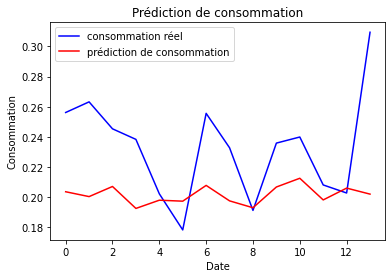

In [40]:
plt.figure()#figsize=(10,6)
plt.plot(y_test_plot, color='blue', label='consommation réel')
plt.plot(predictions , color='red', label='prédiction de consommation')
plt.title('Prédiction de consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.legend()
plt.show()